# Final Project- OPAN 6607 Programming II Data Infrastructure Fall 2024 
## Katrina Marbley
### December 13, 2024

***

### Build a classification model to predict LinkedIn Users and deploy the model on Streamlit

#### Import packages:

In [ ]:
##Load all packages

import numpy as np
import matplotlib.pyplot as plt
import pickle
import plotly.express as px
import matplotlib.pyplot as plt

#Packages to deploy app for Part 2
import streamlit as st




### Ingest Data:

#### Question 1: Read in the data, call the dataframe "s" and check the dimensions of the dataframe

In [162]:
# Data Source: social media usage
s = pd.read_csv("social_media_usage.csv")

In [163]:
s.shape #How many rows and columns does the dataset contain?

(1502, 89)

***

### Examine & Clean Dataset:

#### Check data type of feature columns

In [167]:
print(s['income'].dtype)
print(s['educ2'].dtype)
print(s['age'].dtype)
print(s['par'].dtype)
print(s['marital'].dtype)
print(s['web1h'].dtype)
print(s['gender'].dtype)
print(s['sex'].dtype)

int64
int64
int64
int64
int64
int64
int64
int64


#### Check the total number of missing values in each column

In [169]:
s.isnull().sum()

respid        0
sample        0
comp          0
int_date      0
lang          0
             ..
ql1           0
ql1a          0
qc1           0
weight        0
cellweight    0
Length: 89, dtype: int64

#### Subset the dataset to keep only features specified for project

In [171]:
# Specify relevant columns to keep
subset_df = s[['income', 'educ2', 'age', 'par', 'marital', 'web1h', 'gender']].copy()

#rename columns 

subset_df.rename(columns={
        'educ2': 'education',
        'par': 'parent',
        'marital': 'married'
            }, inplace=True)

subset_df.head()



,income,education,age,parent,married,web1h,gender
0,6,4,77,2,5,2,2
1,5,3,59,2,6,2,1
2,8,4,60,2,1,2,2
3,8,8,73,2,6,2,1
4,7,8,65,2,1,1,2


In [172]:
subset_df.shape  #dataset columns reduced from 89 to 7

(1502, 7)

***

### Feature Engineering:

#### Question 2: Define a function called clean_sm that takes one input, x, and uses `np.where` to check whether x is equal to 1

+ If it is, make the value of x = 1, otherwise make it 0. Return x
+ Create a toy dataframe with three rows and two columns and test your function to make sure it works as expected

In [177]:
#define a function
def clean_sm(x): 
    return np.where(x == 1, 1, 0)


In [178]:
#Create toy DataFrame to test clean_sm function
data = {'feature1': [1, 2, 1], 'feature2': [0, 1, 3]}
toy_df = pd.DataFrame(data)

print(toy_df) #view


   feature1  feature2
0         1         0
1         2         1
2         1         3


In [179]:
#apply clean_sm function to toy_df

cleaned_toy_df = toy_df.map(clean_sm)

print(cleaned_toy_df) 


   feature1  feature2
0         1         0
1         0         1
2         1         0


***

#### Question 3: Create a new dataframe called "ss"



>The new dataframe should contain a target column called sm_li which should be a binary variable ( that takes the value of 1 if it is 1 and 0 otherwise (use clean_sm to create this) which indicates whether or not the individual uses LinkedIn, and the following features: 
>1. income (ordered numeric from 1 to 9, above 9 considered missing), 
>2. education (ordered numeric from 1 to 8, above 8 considered missing), 
>3. parent (binary), 
>4. married (binary),
>5. female (binary), and 
>6. age (numeric, above 98 considered missing). 

In [183]:
#create dataframe ss and add binary target column
ss = pd.DataFrame(subset_df).copy()

ss['sm_li'] = clean_sm(ss['web1h']).copy() #new column
ss.drop('web1h', axis=1,inplace=True)



In [184]:
# Process features as valid values , others set to NaN and others as binary
ss['income'] = ss['income'].apply(lambda x: x if 1 <= x <= 9 else np.nan)

ss['education'] = ss['education'].apply(lambda x: x if 1 <= x <= 8 else np.nan)

ss['parent'] = ss['parent'].apply(lambda x: 1 if x == 1 else (0))

ss['married'] = ss['married'].apply(lambda x: 1 if x == 1 else (0))

ss['gender'] = ss['gender'].apply(lambda x: 1 if x == 2 else (0))

ss['age'] = ss['age'].apply(lambda x: x if x <= 98 else np.nan)

print(ss) # Display the cleaned DataFrame



      income  education   age  parent  married  gender  sm_li
0        6.0        4.0  77.0       0        0       1      0
1        5.0        3.0  59.0       0        0       0      0
2        8.0        4.0  60.0       0        1       1      0
3        8.0        8.0  73.0       0        0       0      0
4        7.0        8.0  65.0       0        1       1      1
...      ...        ...   ...     ...      ...     ...    ...
1497     6.0        4.0  41.0       1        1       0      0
1498     2.0        5.0  46.0       0        0       0      1
1499     7.0        3.0  18.0       0        0       0      0
1500     4.0        3.0  23.0       0        0       1      0
1501     4.0        3.0  50.0       1        1       0      0

[1502 rows x 7 columns]


In [185]:
ss.isnull().sum() #check for sum of missing values

income       229
education     23
age           54
parent         0
married        0
gender         0
sm_li          0
dtype: int64

#### Drop any missing values in "ss"

In [187]:
ss = ss.dropna() #drop values considered as missing 

ss.shape #check dim of ss to validate if rows with missing values are dropped

(1260, 7)

#### Perform exploratory analysis to examine how the features are related to the target -View data & Visualizatons Section for Q3

In [189]:
ss.head()

,income,education,age,parent,married,gender,sm_li
0,6.0,4.0,77.0,0,0,1,0
1,5.0,3.0,59.0,0,0,0,0
2,8.0,4.0,60.0,0,1,1,0
3,8.0,8.0,73.0,0,0,0,0
4,7.0,8.0,65.0,0,1,1,1


***

##### *Scatterplot indicating LinkedIn Usage by Age and Parents*

In [192]:
alt.Chart(ss.groupby(["age", "parent"], as_index=False)["sm_li"].mean()).\
mark_circle().\
encode(x="age",
      y="sm_li",
      color="parent:N")

alt.Chart(...)

***

##### *Plot sm_li as a function of age*

C:\Users\bokat\AppData\Local\Temp\ipykernel_19476\3454038400.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_usage = graph_df.groupby('age_bins')['sm_li'].mean().reset_index()
C:\Users\bokat\AppData\Local\Temp\ipykernel_19476\3454038400.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_usage, x='age_bins', y='sm_li', palette='viridis')


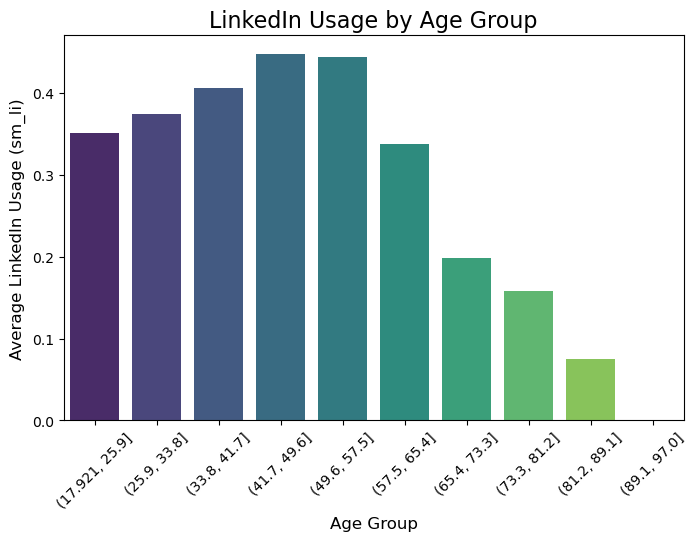

In [195]:
graph_df =ss.copy()

# Create age bins
graph_df['age_bins'] = pd.cut(graph_df['age'], bins=10)  

# Calculate mean LinkedIn usage by age bin
mean_usage = graph_df.groupby('age_bins')['sm_li'].mean().reset_index()

# Plot 
plt.figure(figsize=(8, 5))
sns.barplot(data=mean_usage, x='age_bins', y='sm_li', palette='viridis')
plt.title('LinkedIn Usage by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Average LinkedIn Usage (sm_li)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)  # Rotate x-axis labels for readability
plt.yticks(fontsize=10)

plt.show()


***

##### *Plot LinkedIn Usage by Household Income*

C:\Users\bokat\AppData\Local\Temp\ipykernel_19476\1375515223.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=graph_df, x='income_label', y='sm_li', palette='viridis')


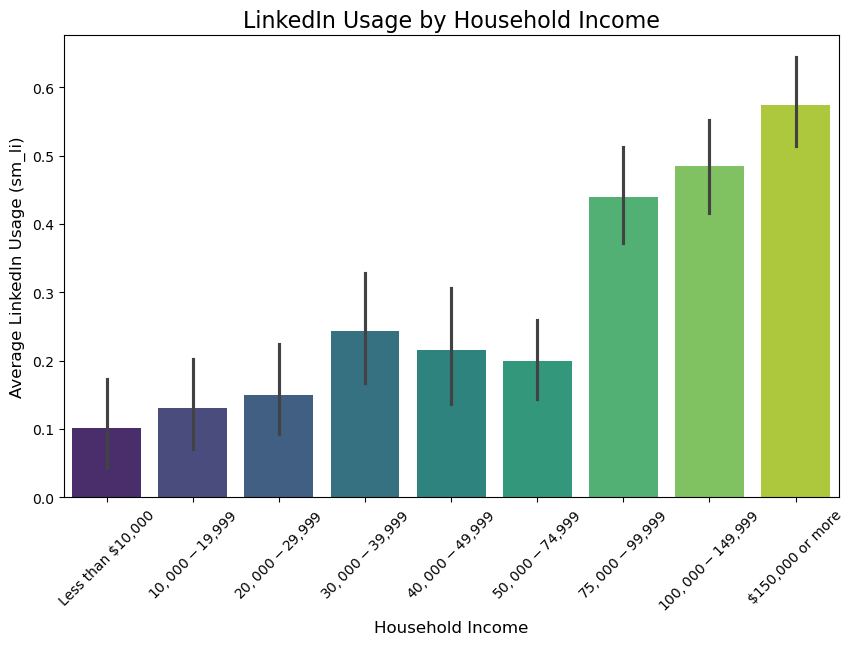

In [198]:
# Create a separate DataFrame for visualization
graph_df = ss.copy()

# Handle NaN values and convert to integers in the new DataFrame
graph_df = graph_df.dropna(subset=['income'])  # Drop rows where income is NaN
graph_df['income'] = graph_df['income'].astype(int)  # Convert to integer for mapping

# Replace numeric income categories with their descriptions
income_labels = [
    "Less than $10,000",
    "$10,000-$19,999",
    "$20,000-$29,999",
    "$30,000-$39,999",
    "$40,000-$49,999",
    "$50,000-$74,999",
    "$75,000-$99,999",
    "$100,000-$149,999",
    "$150,000 or more"
]

# Map the income labels in the new DataFrame
graph_df['income_label'] = graph_df['income'].map(lambda x: income_labels[x - 1])


graph_df['income_label'] = pd.Categorical(  # Specify the ordinal order for income categories
    graph_df['income_label'],
    categories=income_labels,
    ordered=True
)

# Plot LinkedIn usage by income
plt.figure(figsize=(10, 6))
sns.barplot(data=graph_df, x='income_label', y='sm_li', palette='viridis')

# Customize labels and title
plt.title('LinkedIn Usage by Household Income', fontsize=16)
plt.xlabel('Household Income', fontsize=12)
plt.ylabel('Average LinkedIn Usage (sm_li)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

plt.show()


***

##### *Plot Proportion of LinkedIn Users by Gender and Marital Status*

C:\Users\bokat\AppData\Local\Temp\ipykernel_19476\2182346508.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_data, x='group_label', y='sm_li', palette='viridis')


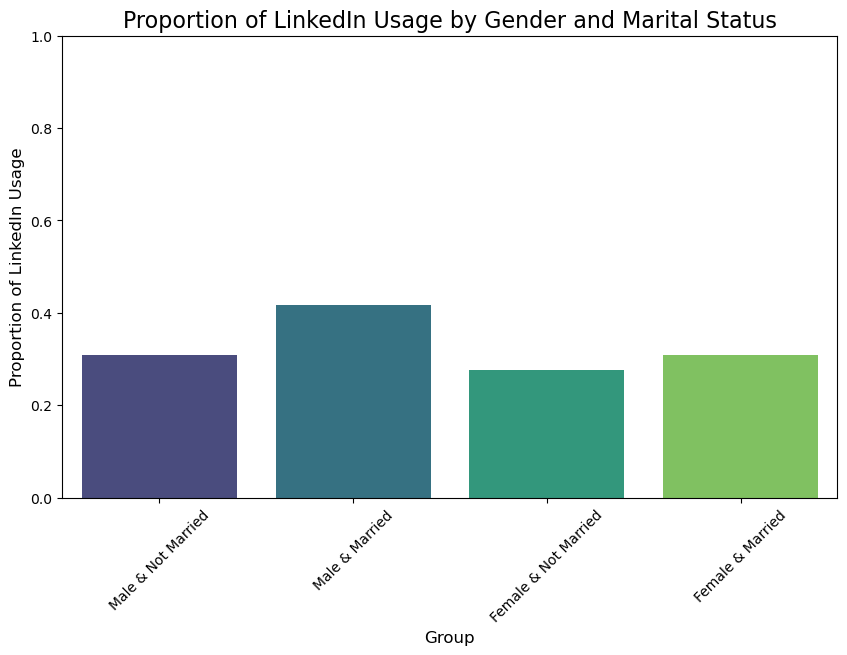

In [201]:
# Create a subset with relevant columns and filter necessary rows
subset_df = ss[['gender', 'married', 'sm_li']].copy()

subset_df['female'] = subset_df['gender']  # Rename gender to female for clarity

grouped_data = subset_df.groupby(['female', 'married'])['sm_li'].mean().reset_index() # proportion of LinkedIn users female and married

grouped_data['female_label'] = grouped_data['female'].map({0: 'Male', 1: 'Female'}) 
grouped_data['married_label'] = grouped_data['married'].map({0: 'Not Married', 1: 'Married'})

grouped_data['group_label'] = grouped_data['female_label'] + ' & ' + grouped_data['married_label'] # Create a combined label for the groups

# Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_data, x='group_label', y='sm_li', palette='viridis')

# Customize labels and title
plt.title('Proportion of LinkedIn Usage by Gender and Marital Status', fontsize=16)
plt.xlabel('Group', fontsize=12)
plt.ylabel('Proportion of LinkedIn Usage', fontsize=12)
plt.ylim(0, 1)  # Proportion values range from 0 to 1
plt.xticks(rotation=45, fontsize=10)  # Rotate labels for clarity
plt.yticks(fontsize=10)

plt.show()


***

##### *Plot Proportion of Females Using LinkedIn*

C:\Users\bokat\AppData\Local\Temp\ipykernel_19476\24328914.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_data, x='Category', y='Proportion', palette= 'Greens')


Text(0.5, 1.0, 'Proportion of Females Using Linked')

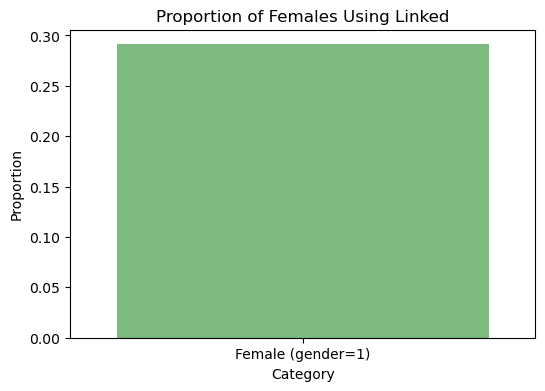

In [204]:
# Filter for females only (gender = 1)
female_df = ss[ss['gender'] == 1]

# Calculate the proportion of LinkedIn users among females
female_linkedin_usage = female_df['sm_li'].mean()  # Proportion of sm_li = 1

# Create a DataFrame for plotting
plot_data = pd.DataFrame({
    'Category': ['Female (gender=1)'],
    'Proportion': [female_linkedin_usage]
})

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(data=plot_data, x='Category', y='Proportion', palette= 'Greens')

# Customize labels and title
plt.title('Proportion of Females Using Linked')


***

In [206]:
alt.Chart(ss.groupby(["age", "gender"], as_index=False)["sm_li"].mean()).\
mark_square().\
encode(x="age",
      y="sm_li",
      color="gender:N")

alt.Chart(...)

***

#### Question 4: Create a target vector (y) and feature set (X)

In [209]:
# Define features and target
X = ss.drop(columns=['sm_li'])  # Drop the target column to keep features
y = ss['sm_li']     


print(f"Shape of X (features): {X.shape}")
print(f"Shape of y (target): {y.shape}")

print(f"Shape of X (features): {X.info()}")


Shape of X (features): (1260, 6)
Shape of y (target): (1260,)
<class 'pandas.core.frame.DataFrame'>
Index: 1260 entries, 0 to 1501
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   income     1260 non-null   float64
 1   education  1260 non-null   float64
 2   age        1260 non-null   float64
 3   parent     1260 non-null   int64  
 4   married    1260 non-null   int64  
 5   gender     1260 non-null   int64  
dtypes: float64(3), int64(3)
memory usage: 68.9 KB
Shape of X (features): None


In [210]:
print(ss.columns)

Index(['income', 'education', 'age', 'parent', 'married', 'gender', 'sm_li'], dtype='object')


***

#### Question 5: Split the data into training and test sets. Hold out 20% of the data for testing

+ Explain what each new object contains and how it is used in machine learning

In [214]:
# Split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X.values,
                                                    y,
                                                    stratify=y,       # same number of target in training & test set
                                                    test_size=0.2,    # hold out 20% of data for testing
                                                    random_state=987) # set for reproducibility

# Display the shapes of the resulting datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (1008, 6)
X_test shape: (252, 6)
y_train shape: (1008,)
y_test shape: (252,)


+ X_train contains 80% of the data and contains the features used to predict the target when training the model. 
+ X_test contains 20% of the data and contains the features used to test the model on unseen data to evaluate performance. 
+ y_train contains 80% of the the data and contains the target that we will predict using the features when training the model. 
+ y_test contains 20% of the data and contains the target we will predict when testing the model on unseen data to evaluate performance.


***

### Train Logistic Regression Model

#### Question 6: Instantiate a logistic regression model and set class_weight to balanced. Fit the model with the training data.

In [219]:
from sklearn.linear_model import LogisticRegression

# Initialize the logistic regression model with class_weight set to 'balanced'
ss_model = LogisticRegression(class_weight='balanced')

# Fit the model with the training data
ss_model.fit(X_train, y_train)

with open("ss_model.pkl", "wb") as file:
    pickle.dump(ss_model, file)

print("Model saved successfully!")




Model saved successfully!


***

### Evaluate Model 

#### Question 7: Evaluate the model using the testing data. What is the model accuracy for the model?

+ Use the model to make predictions and then generate a confusion matrix from the model. 
+ Interpret the confusion matrix and explain what each number means.

In [224]:
# Predict on the test data
y_pred = ss_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred) #from sklearn.metrics import accuracy_score, confusion_matrix
print(f"Model Accuracy: {accuracy:.2f}") # Calculate and print accuracy

# Generate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")



Model Accuracy: 0.69
Confusion Matrix:
[[111  57]
 [ 21  63]]


+ Model Accuracy: 1.00
+ TN (111): 111 negative samples were correctly classified as negative.
+ FP (57): 57 negative samples were incorrectly classified as positive.
+ FN (21): 21 positive samples were incorrectly classified as negative.
+ TP (63): 63 positive samples were correctly classified as positive.

***

#### Question 8: 
#### Create the confusion matrix as a dataframe and add informative column names and index names that indicate what each quadrant represents.

In [228]:
pd.DataFrame(confusion_matrix(y_test, y_pred),
            columns=["Predicted negative", "Predicted positive"],
            index=["Actual negative","Actual positive"]).style.background_gradient(cmap="inferno")

,Predicted negative,Predicted positive
Actual negative,111,57
Actual positive,21,63


***

#### Question 9: 

#### Aside from accuracy, there are three other metrics used to evaluate model performance: precision, recall, and F1 score. 
+ Use the results in the confusion matrix to calculate each of these metrics by hand.
+ Discuss each metric and give an actual example of when it might be the preferred metric of evaluation.
+ After calculating the metrics by hand, create a classification_report using sklearn and check to ensure your metrics match those of the classification_report.

In [232]:
## Accuracy: TP+TN/(TP+TN+FP+FN)
# (63+111)/(63+111+57+21) = 174/252 = 0.69

## Recall: TP/(TP+FN)
# 63/(63+21) =0.75

## Precision: TP/(TP+FP)
# 63/(63+57) = 63/120 = 0.53

## F1 score: 2 * (Precision x Recall)/(precision + Recall) 
# 2 * [(0.53 x 0.75)/(0.53+0.75)] =2* [0.40/1.28] = 2 *.31 =.62

In [233]:
# Get other metrics with classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.66      0.74       168
           1       0.53      0.75      0.62        84

    accuracy                           0.69       252
   macro avg       0.68      0.71      0.68       252
weighted avg       0.74      0.69      0.70       252



+ **Recall Example:**
  > Recall measures the proportion of actual positives that are correctly identified. High recall minimizes false negatives. Low Recall is a problem in disease detection (e.g., cancer diagnosis). The general rule for Recall is ≥ 0.7 (70%), especially in critical applications.
  
+ **Precision Example:**
  >Of all the predicted positives, only 52.5% were truly positive. A low precision suggests many false positives. acceptable low precision might be acceptable in early stages of disease screening where recall is more important. Another example: In spam email detection, a low precision means many legitimate emails are falsely flagged as spam, frustrating users.

+ **F1 score Example:**
  >Below 0.6 (60%) is typically considered low. A low F1 Score indicates the model fails to balance precision and recall effectively. In fraud detection, where both false positives (inconveniencing customers) and false negatives (missing fraud) are costly, the F1 score is a useful measure.
  

##### The model has a moderate recall (75%) but low precision (52.5%), indicating it tends to overpredict the positive class, resulting in many false positives.

***

### Make Predictions 

#### Question 10: Use the model to make predictions

+ For instance, what is the probability that a high income (e.g. income=8), with a high level of education (e.g. 7), non-parent who is married female and 42 years old uses LinkedIn? 
+ How does the probability change if another person is 82 years old, but otherwise the same?

In [240]:
print(ss.columns)

Index(['income', 'education', 'age', 'parent', 'married', 'gender', 'sm_li'], dtype='object')


In [241]:
#Example: Predict on new data

# Define new data for predictions
person1 = [8, 7, 42, 0, 1, 1]
person2 = [8, 7, 82, 0, 1, 1]

# Predict classes and probabilities
predicted_class1 = ss_model.predict([person1])[0]
predicted_class2 = ss_model.predict([person2])[0]
probs1 = ss_model.predict_proba([person1])[0]
probs2 = ss_model.predict_proba([person2])[0]

# Create the DataFrame
results = pd.DataFrame({
    'Person': ['Person1', 'Person2'],
    'Features': [person1, person2],
    'Predicted Class': [predicted_class1, predicted_class2],
    'Probability of Class 1 (LinkedIn_usage)': [probs1[1], probs2[1]]
})

# Format display
pd.set_option('display.max_colwidth', None)  # Prevent truncation of long columns
print(results.to_string(index=False))



 Person            Features  Predicted Class  Probability of Class 1 (LinkedIn_usage)
Person1 [8, 7, 42, 0, 1, 1]                1                                 0.731613
Person2 [8, 7, 82, 0, 1, 1]                0                                 0.471008


***

### Information for Part 2

+ Use this code for the app
+ Save as linkedIn_app.py
+ on commandline --streamlit run linkedin_app.py
+ load the trained model
+
>Train the model
ss_model.fit(X_train, y_train)

>Make predictions
y_pred = ss_model.predict(X_test)

>Check accuracy
from sklearn.metrics import accuracy_score
#print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

>(Optional) Compare results
#print("Predicted:", y_pred)
#print("Actual:", y_test)


In [245]:
#import streamlit as st
import numpy as np
import pickle
import matplotlib.pyplot as plt

# Load the trained model
km_model = pickle.load(open("ss_model.pkl", "rb"))

# Define feature labels
income_labels = [
    "Less than $10,000", "$10,000-$19,999", "$20,000-$29,999",
    "$30,000-$39,999", "$40,000-$49,999", "$50,000-$74,999",
    "$75,000-$99,999", "$100,000-$149,999", "$150,000 or more"
]
education_labels = [
    "Less than high school", "High school incomplete", "High school graduate",
    "Some college, no degree", "Associate degree", "Bachelor’s degree",
    "Master’s degree", "Doctorate or professional degree"
]

# Helper function to preprocess inputs
def preprocess_input(income, education, age, parent, married, gender):
    income = income if 1 <= income <= 9 else np.nan
    education = education if 1 <= education <= 8 else np.nan
    age_bin = (
        1 if age <= 18 else
        2 if age <= 35 else
        3 if age <= 55 else
        4 if age <= 75 else
        5 if age <= 98 else np.nan
    )
    return [
        income, education, age_bin,
        1 if parent == "Yes" else 0,
        1 if married == "Yes" else 0,
        1 if gender == "Female" else 0
    ]

# Plotting function for prediction probabilities
def plot_probabilities(probabilities):
    plt.bar(['Not a LinkedIn User', 'LinkedIn User'], probabilities, color=['red', 'green'])
    plt.title("Prediction Confidence")
    plt.ylabel("Probability")
    st.pyplot(plt)

# Streamlit App
st.title("LinkedIn User Prediction App")

# User inputs
income = st.selectbox("Income Range", range(1, 10), format_func=lambda x: income_labels[x - 1])
education = st.selectbox("Education Level", range(1, 9), format_func=lambda x: education_labels[x - 1])
age = st.number_input("Age (years)", min_value=0, max_value=98, step=1)
parent = st.radio("Are you a parent?", ["Yes", "No"])
married = st.radio("Are you married?", ["Yes", "No"])
gender = st.radio("Gender", ["Female", "Male"])

# Predict button
if st.button("Predict"):
    features = preprocess_input(income, education, age, parent, married, gender)

    if np.nan in features:
        st.error("Some inputs are invalid. Please check and try again.")
    else:
        prediction = model.predict([features])[0]
        probabilities = model.predict_proba([features])[0]

        st.subheader("Prediction Results")
        st.write(f"**LinkedIn User?** {'Yes' if prediction == 1 else 'No'}")
        st.write(f"**Probability of being a LinkedIn user:** {probabilities[1]:.2%}")

        st.subheader("Prediction Confidence")
        plot_probabilities(probabilities)


NameError: name 'st' is not defined

#### Deploy

***

[my_app] https://github.com/1606git/Test-Project/blob/main/draft4test.py